In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
#Importar los datos de csv a colab
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Datos
data=pd.read_csv('/content/drive/Shareddrives/Astrofísica Computacional/Taller8/data01.csv')
data

,Unnamed: 0,x,y,phi
0,0,73.517682,44.800793,1116.826387
1,1,32.756284,28.724427,1066.212487
2,2,-13.308013,2.458485,490.735354
3,3,62.884936,5.696075,-1130.689639
4,4,47.861635,29.955114,782.448037
...,...,...,...,...
166,166,84.174447,7.278451,-1540.365854
167,167,-23.119203,9.013067,1145.697153
168,168,-5.747350,18.067861,1308.279480
169,169,16.419795,12.980806,450.696513


In [ ]:
class perceptron1:
  def __init__(self):
    np.random.seed(413)
    w1 = np.random.rand()*10
    w2 = np.random.rand()*10
    self.w = np.array([w1,w2])
    self.bias = np.random.rand()*10
        
  def predict(self, x):
    return np.dot(self.w, x) + self.bias
    
  def fC(self):
    self.yp = self.predict(self.x)
    return np.sum((self.yp - self.y)**2)
    
  def grad_fC(self):
    self.yp = self.predict(self.x)
    #print([np.sum(2*(self.yp - self.y)*self.x), sum(2*(self.yp - self.y))])
    return [np.sum(2*(self.yp - self.y)*self.x), sum(2*(self.yp - self.y))] 
 
  def improve(self):
    alpha = 1e-7 
    self.w -= alpha*self.grad_fC()[0]
    self.bias -= alpha*self.grad_fC()[1]
        
  def train(self, x, y, epochs):
    self.x = x
    self.y = y
    self.yp = self.predict(self.x) 
    history = np.zeros(epochs)
    for i in range(epochs):
      history[i] = self.fC()
      self.improve()
    return history

In [ ]:
x = np.array(data['x'])
y = np.array(data['y'])
X = np.array([x,y])
phi = np.array(data['phi'])

p = perceptron1()
epochs = 1500000
history = p.train(X, phi, epochs)
print(r'f_c = ', history[0])
print(r'Función de costo final con ', epoch,'epocas =' , history[-1])
print('w1=',p.w[0],'w2=',p.w[1],'b=',p.bias)


initial cost =  415226788.1077048
final cost after 1500000 epochs =  256421437.8065375
w1= -14.352607411384692 w2= -17.07003395268208 b= 1483.2324956131201


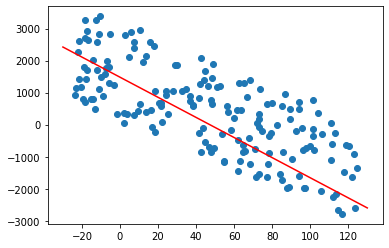

In [ ]:
xp = np.linspace(-30,130) 
yp = np.linspace(-30,130) 
Yp = p.w[0]*xp + p.w[1]*yp + p.bias
plt.plot(xp, Yp, color = 'red')
plt.scatter(data['x'],data['phi'])

In [ ]:
class perceptron2:
  def __init__(self):
    np.random.seed(413)
    w1 = np.random.rand()*10
    w2 = np.random.rand()*10
    self.w = np.array([w1,w2])
    self.bias = np.random.rand()*10

  def relu(self,z0):
    z1 = np.zeros(z0)
    for i in range(len(z0)):
      if z0[i]>0:
        z1[i] = z0[i]
      else:
        z1[0] = 0
    return z1
        
  def predict(self, x):
    z = np.dot(self.w, x) + self.bias
    return self.relu(z) 
    
  def fC(self):
    self.yp = self.predict(self.x)
    return np.sum((self.yp - self.y)**2)
    
  def grad_fC(self):
    self.yp = self.predict(self.x)
    #print([np.sum(2*(self.yp - self.y)*self.x), sum(2*(self.yp - self.y))])
    return [np.sum(2*(self.yp - self.y)*self.x), sum(2*(self.yp - self.y))] 
 
  def improve(self):
    alpha = 1e-9 # Learning Rate
    self.w -= alpha*self.grad_fC()[0]
    self.bias -= alpha*self.grad_fC()[1]
        
  def train(self, x, y, epochs):
    self.x = x
    self.y = y
    self.yp = self.predict(self.x) # Initial prediction
    history = np.zeros(epochs)
    for i in range(epochs):
      history[i] = self.fC()
      self.improve()
    return history

In [ ]:
x2 = np.array(data['x'])
y2 = np.array(data['y'])
X2 = np.array([x2,y2])
phi2 = np.array(data['phi'])

p2 = perceptron2()
epochs2 = 14000
history2 = p2.train(X2, phi2, epochs2)
print('initial cost = ', history2[0])
print(f'final cost after {epochs2:.0f} epochs = ', history2[-1])
print('w1=',p2.w[0],'w2=',p2.w[1],'b=',p2.bias)

initial cost =  413770349.28163874
final cost after 14000 epochs =  346596614.80511487
w1= -8.963269437807245 w2= -11.680695979111908 b= 2.689335881818462


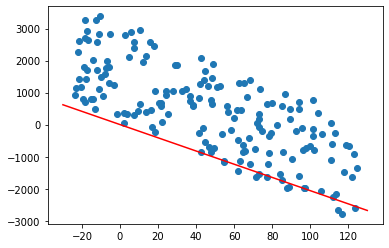

In [ ]:
xp1 = np.linspace(-30,130) 
yp1 = np.linspace(-30,130) 
Yp1 = p2.w[0]*xp1 + p2.w[1]*yp1 + p2.bias
plt.plot(xp1, Yp1, color = 'red')
plt.scatter(data['x'],data['phi'])

--------
##Implementación no-lineal

In [ ]:
#Datos 2
data2=pd.read_csv('/content/drive/Shareddrives/Astrofísica Computacional/Taller8/data02.csv')
data2

,Unnamed: 0,x,psi
0,0,48.517682,3813.612730
1,1,7.756284,-40.293225
2,2,-38.308013,3603.551985
3,3,37.884936,2167.607856
4,4,22.861635,612.799280
...,...,...,...
195,195,70.160036,8560.980559
196,196,-20.880126,1226.801640
197,197,69.542900,8399.657767
198,198,-34.494058,2979.573084


In [ ]:
class NoLinealPerceptron:
  def __init__(self):
    np.random.seed(413)
    self.w1 = np.random.rand()*10
    self.w2 = np.random.rand()*10
    self.bias = np.random.rand()*10
        
  def predict(self, x):
    return self.w1*(x**2) + self.w2*x + self.bias
    
  def fC(self):
    self.yp = self.predict(self.x)
    return np.sum((self.yp - self.y)**2)
    
  def grad_fC(self):
    self.yp = self.predict(self.x)
    return [sum(2*(self.yp - self.y)*(self.x**2)), sum(2*(self.yp - self.y)*self.x), sum(2*(self.yp - self.y))] 
 
  def improve(self):
    alpha = 1e-11 
    self.w1 -= alpha*self.grad_fC()[0]
    self.w2 -= alpha*self.grad_fC()[1]
    self.bias -= alpha*self.grad_fC()[2]
        
  def train(self, x, y, epochs):
    self.x = x
    self.y = y
    self.yp = self.predict(self.x) 
    history = np.zeros(epochs)
    for i in range(epochs):
      history[i] = self.fC()
      self.improve()
    return history

In [ ]:
X3 = np.array(data2['x'])
psi = np.array(data2['psi'])

pnl = NoLinealPerceptron()
epochs3 = 1000000
history3 = pnl.train(X3, psi, epochs3)
print('initial cost = ', history3[0])
print(f'final cost after {epochs3:.0f} epochs = ', history3[-1])
print('w1=',pnl.w1,'w2=',pnl.w2,'b=',pnl.bias)


initial cost =  52741589641.446045
final cost after 1000000 epochs =  111098.3238205561
w1= 1.9878799534756924 w2= -17.299348336733427 b= 0.8448286799212132


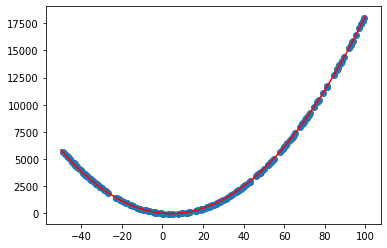

In [ ]:
xp2 = np.linspace(-50,100) 
Yp2 = pnl.w1*xp2**2 + pnl.w2*xp2 + pnl.bias
plt.plot(xp2,Yp2, color = 'red')
plt.scatter(data2['x'],data2['psi'])